# Часть 1. Предобработка текста и классификация

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Прочитайте текст в файлах positive.txt и negative.txt

In [2]:
with open("positive.txt", "r", encoding="utf-8") as file:
    positive_plain = file.read()

with open("negative.txt", "r", encoding="utf-8") as file:
    negative_plain = file.read()

In [3]:
print(positive_plain[:400], negative_plain[:400], sep="\n\n")

@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа). Да, все-таки он немного похож на него Но мой мальчик все равно лучше:D. RT @KatiaCheh: Ну ты идиотка) я испугалась за тебя!!!. RT @digger2912: "Кто то в углу сидит и погибает от голода, а мы ещё 2 порции взяли, хотя уже и так жрать не хотим" :DD . @irina_dyshkant Вот что значит страшилка :D

Но бли

на работе был полный пиддес :| и так каждое закрытие месяца, я же свихнусь так D:. Коллеги сидят рубятся в Urban terror, а я из-за долбанной винды не могу :(. @elina_4post как говорят обещаного три года ждут((. Желаю хорошего полёта и удачной посадки,я буду очень сильно скучать( . Обновил за каким-то лешим surf, теперь не работает простоплеер :(. Котёнка вчера носик разбила, плакала и расстраивала


### Разбейте данные на предложения

Для токенизации используйте nltk.sent_tokenize. чтобы удалить имен пользователей из сообщений напишите регулярное выражение.

<b>Классы символов в регулярных выражениях</b>:

[A-Z] – символы верхнего регистра (латиница)

[a-z] – символы нижнего регистра (латиница)

[А-Я] – символы верхнего регистра (кириллица)

[а-я] – символы нижнего регистра (кириллица)

[0-9] или \d – цифра

[^0-9] или \D – любой символ, кроме цифры

. – Один любой символ, кроме новой строки \n.

? – 0 или 1 вхождение шаблона слева

\+ – 1 и более вхождений шаблона слева

\* – 0 и более вхождений шаблона слева

\w – Любая цифра или буква (\W — все, кроме буквы или цифры)

\d – Любая цифра [0-9] (\D — все, кроме цифры)

\s – Любой пробельный символ (\S — любой непробельнй символ)

\b – Граница слова

[..] – дин из символов в скобках ([^..] — любой символ, кроме тех, что в скобках)

\ – Экранирование специальных символов (\. означает точку или \+ — знак «плюс»)

^ и $ – Начало и конец строки соответственно

{n,m} – От n до m вхождений ({,m} — от 0 до m)

a|b – Соответствует a или b

() – Группирует выражение и возвращает найденный текст

\t, \n, \r – Символ табуляции, новой строки и возврата каретки соответственно

In [57]:
import re
from nltk import sent_tokenize


def split_data(text):
    # Избавляемся от имен пользователей, указанных в письмах
    name = re.compile(r'@[A-Z_a-z]+:?')
    res = name.sub("", text)
    # Удалите лишние переносы строк и разбейте на предложения по знаку "."
    res = sent_tokenize(res.replace('\n', ' '))
#     res = [item for item in res.replace('\n', ' ').split('.') if item.strip()]
    return res

In [58]:
positive = split_data(positive_plain)
negative = split_data(negative_plain)

In [59]:
len(positive), len(negative)

(5827, 5867)

In [60]:
pos_labels = [1] * len(positive)

In [61]:
neg_labels = [0] * len(negative)

Объединим все в один список

In [62]:
all_text = positive + negative
all_labels = pos_labels + neg_labels

### Предварительный анализ коллекции

#### Средняя длина предложений

In [63]:
import pandas as pd

In [64]:
df = pd.DataFrame(all_text)

In [65]:
df

,0
0,"хоть я и школота, но поверь, у нас то же само..."
1,"Да, все-таки он немного похож на него Но мой м..."
2,"RT 2912: ""Кто то в углу сидит и погибает от го..."
3,"Вот что значит страшилка :D Но блин,посмотрев..."
4,— Я не знаю кто ты бля:D .
5,"RT Ох,900 :D ну это конечно же Чтобы у нее ..."
6,RT У тебя есть ухажёр?
7,Нет - мои уши не кто не жрёт :D. Поприветствуе...
8,Теперь у меня есть частичка Сиднея :) #Sydney ...
9,Люблю маму и папу!!!


In [66]:
len_data = df[0].apply(len)

In [67]:
len_data.describe()

count    11694.000000
mean        60.528647
std         35.622165
min          1.000000
25%         36.000000
50%         55.000000
75%         80.000000
max        309.000000
Name: 0, dtype: float64

#### Длины текстов в символах

In [68]:
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


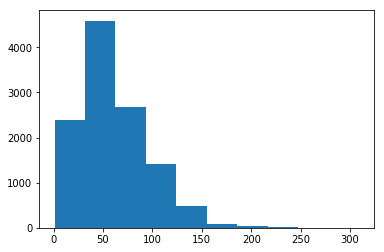

In [69]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(len_data.tolist())

fig.show()

#### Самые частые слова

Токенизируйте предложения на слова (nltk.word_tokenize)

In [70]:
from nltk import word_tokenize


all_text = [word_tokenize(line) for line in all_text]

In [73]:
all_text[0]

['хоть',
 'я',
 'и',
 'школота',
 ',',
 'но',
 'поверь',
 ',',
 'у',
 'нас',
 'то',
 'же',
 'самое',
 ':',
 'D',
 'общество',
 'профилирующий',
 'предмет',
 'типа',
 ')',
 '.']

In [74]:
from nltk import FreqDist


n_types = []
n_tokens = []
fd = FreqDist()
for line in all_text:
    fd.update(line)
    n_types.append(len(fd)) # same as n_types.append(fd.B())
    n_tokens.append(sum(list(fd.values()))) # same as n_tokens.append(fd.N())
for i in fd.most_common(10):
    print(i)

('.', 9509)
('(', 9258)
(')', 8719)
(',', 8317)
(':', 5003)
('не', 3029)
('!', 2904)
('и', 2402)
('я', 2358)
('в', 2333)


In [144]:
len(fd), fd.B(), fd.N(), sum([len(line) for line in all_text]), sum(list(fd.values()))

(29645, 29645, 164608, 146820, 164608)

#### Закон Ципфа

В любом достаточно большом тексте ранг типа обратно пропорционален его частоте: f=a/r

f – частота типа, r – ранг типа, a – параметр, для славянских языков – около 0.07

In [79]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)
freqs

[9509,
 9258,
 8719,
 8317,
 5003,
 3029,
 2904,
 2402,
 2358,
 2333,
 1638,
 1626,
 1478,
 1436,
 1179,
 1165,
 958,
 839,
 824,
 811,
 786,
 750,
 724,
 698,
 639,
 605,
 540,
 538,
 511,
 504,
 499,
 497,
 476,
 439,
 434,
 426,
 405,
 399,
 356,
 354,
 341,
 337,
 336,
 333,
 320,
 315,
 308,
 302,
 299,
 298,
 289,
 285,
 277,
 268,
 268,
 262,
 255,
 251,
 250,
 249,
 243,
 234,
 226,
 224,
 223,
 215,
 214,
 213,
 208,
 207,
 206,
 200,
 198,
 188,
 181,
 179,
 178,
 177,
 175,
 169,
 168,
 167,
 166,
 166,
 164,
 163,
 161,
 158,
 155,
 153,
 152,
 147,
 145,
 144,
 143,
 142,
 136,
 135,
 135,
 134,
 131,
 129,
 126,
 126,
 125,
 123,
 121,
 121,
 121,
 121,
 119,
 119,
 119,
 119,
 118,
 111,
 111,
 110,
 109,
 106,
 106,
 106,
 106,
 105,
 104,
 104,
 102,
 101,
 101,
 101,
 100,
 100,
 98,
 97,
 97,
 94,
 93,
 92,
 91,
 90,
 90,
 89,
 88,
 88,
 86,
 85,
 84,
 83,
 82,
 81,
 81,
 80,
 79,
 79,
 78,
 78,
 78,
 78,
 78,
 77,
 76,
 76,
 76,
 75,
 73,
 73,
 72,
 71,
 71,
 70,
 7

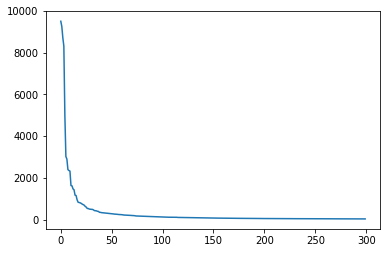

In [80]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(range(300), freqs[:300])
plt.show()

#### Закон Хипса

С увеличением длины текста (количества токенов), количество типов увеличивается в соответствии с законом: |V|=K∗N^b

N – число токенов, |V| – количество типов в словаре, K,b – параметры, обычно K∈[10,100],b∈[0.4,0.6]

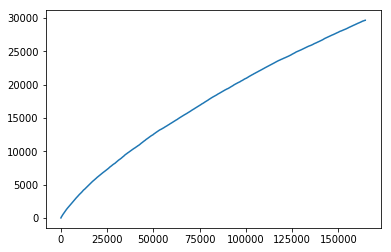

In [145]:
fig, ax = plt.subplots()
ax.plot(n_tokens, n_types)
plt.show()

### Подготовим данные для nltk.NaiveBayesClassifier

Классификатор принимает данные о предложении в виде словаря {"слово": #количество встреч в предожении}

Используйсте Counter. Пример работы:

Counter('abracadabra')

>Counter({'a': 5, 'b': 2, 'c': 1, 'd': 1, 'r': 2})

In [82]:
from collections import Counter

In [85]:
all_text = [Counter(line) for line in all_text]
all_text[0]

Counter({'хоть': 1,
         'я': 1,
         'и': 1,
         'школота': 1,
         ',': 2,
         'но': 1,
         'поверь': 1,
         'у': 1,
         'нас': 1,
         'то': 1,
         'же': 1,
         'самое': 1,
         ':': 1,
         'D': 1,
         'общество': 1,
         'профилирующий': 1,
         'предмет': 1,
         'типа': 1,
         ')': 1,
         '.': 1})

### Обучим модель

In [86]:
from sklearn.metrics import accuracy_score
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(all_text, all_labels, test_size=0.1)

In [97]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

### Протестируем качество классификации

In [98]:
pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

# Добавим признаков

Для каждого примера добавим количество частей речи в нем. Если мы встретили знак пунктуации, то обозначим его как 'PNCT'.

In [99]:
import pymorphy2

In [100]:
morph = pymorphy2.analyzer.MorphAnalyzer()

Используйте pymorphy2.analyzer.MorphAnalyzer.parse

In [103]:
all_text_with_pos = []
for sample in all_text:
    update = Counter(sample)
    for word, count in sample.items():
        word_parsed = morph.parse(word)[0]
        pos = str(word_parsed.tag.POS)
        if not pos:
            pos = 'PNCT'
        update.update({pos:count})
    all_text_with_pos.append(update)

In [106]:
all_text_with_pos[0]

Counter({'хоть': 1,
         'я': 1,
         'и': 1,
         'школота': 1,
         ',': 2,
         'но': 1,
         'поверь': 1,
         'у': 1,
         'нас': 1,
         'то': 1,
         'же': 1,
         'самое': 1,
         ':': 1,
         'D': 1,
         'общество': 1,
         'профилирующий': 1,
         'предмет': 1,
         'типа': 1,
         ')': 1,
         '.': 1,
         'CONJ': 5,
         'NPRO': 2,
         'ADJS': 1,
         'None': 6,
         'PREP': 1,
         'PRCL': 1,
         'ADJF': 1,
         'NOUN': 3,
         'PRTF': 1})

In [107]:
X_train, X_test, y_train, y_test = train_test_split(all_text_with_pos, all_labels, test_size=0.1)

In [108]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

In [109]:
pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9213675213675213

### Попробуем лемматизировать слова

Обучите тот же классификатор но на примерах, где все слова в нормальной форме.

In [147]:
morph = pymorphy2.analyzer.MorphAnalyzer()

In [151]:
all_text_with_pos = []
for sample in all_text:
    update = Counter()
    for word, count in sample.items():
        word_parsed = morph.parse(word)[0].normal_form
        update.update({word_parsed:count})
    all_text_with_pos.append(update)

In [154]:
all_text_with_pos[0]

Counter({'хоть': 1,
         'я': 1,
         'и': 1,
         'школотый': 1,
         ',': 2,
         'но': 1,
         'поверь': 1,
         'у': 1,
         'мы': 1,
         'то': 1,
         'же': 1,
         'самый': 1,
         ':': 1,
         'd': 1,
         'общество': 1,
         'профилировать': 1,
         'предмет': 1,
         'тип': 1,
         ')': 1,
         '.': 1})

In [155]:
X_train, X_test, y_train, y_test = train_test_split(all_text_with_pos, all_labels, test_size=0.1)
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9358974358974359

### Как изменилось качество? Почему?

# Часть 2. Использование знаний морфологии для генерации текста

Задание: написать шаблон вида: {person} {action} {count} {target}. Где

Person - лицо которое выполняет действие action. Каждое такое действие может быть в трех временах (настоящее, прошедшее и будущее). Действие выполняется с целью target. Такая цель - это некоторый объект или объекты числом count. count>0.

Используйте make_agree_with_number, parse и inflect из библиотеки pymorphy2.

Времена глаголов в документации pymorphy2: past (прошедшее), pres (настоящее), futr (будущее).

In [110]:
import pymorphy2
morph = pymorphy2.analyzer.MorphAnalyzer()

Согласование существительного с числом.

In [114]:
butyavka = morph.parse("бутявка")[0]
butyavka.make_agree_with_number(2)

Parse(word='бутявки', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явки', 8, 1), (<UnknownPrefixAnalyzer>, 'бут')))

Чтобы поставить слово в нужную форму используется inflect

In [112]:
butyavka.inflect({'gent'})  # нет кого? (родительный падеж)

Parse(word='бутявки', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явки', 8, 1), (<UnknownPrefixAnalyzer>, 'бут')))

In [115]:
butyavka.inflect({'plur', 'gent'})

Parse(word='бутявок', tag=OpencorporaTag('NOUN,inan,femn plur,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явок', 8, 8), (<UnknownPrefixAnalyzer>, 'бут')))

In [227]:
def genarate(person, action, time, count, target):
    # Поставьте action в нужное время
    inflect = {time, morph.parse(person)[0].tag.gender}
    action = morph.parse(action)[0].inflect(inflect).word
    target = morph.parse(target)[0].make_agree_with_number(count).word
    return "{person} {action} {count} {target}".format(person=person, action=action, count=count, target=target)

In [230]:
genarate("Даша", "съел", "past", 3, "корейцы")

'Даша съела 3 корейца'

In [234]:
for l in morph.parse('ел')[0].lexeme:
    print(l.word, l.tag.POS)

есть INFN
ем VERB
едим VERB
ешь VERB
едите VERB
ест VERB
едят VERB
ел VERB
ела VERB
ело VERB
ели VERB
ешь VERB
ешьте VERB
едящий PRTF
едящего PRTF
едящему PRTF
едящего PRTF
едящий PRTF
едящим PRTF
едящем PRTF
едящая PRTF
едящей PRTF
едящей PRTF
едящую PRTF
едящей PRTF
едящею PRTF
едящей PRTF
едящее PRTF
едящего PRTF
едящему PRTF
едящее PRTF
едящим PRTF
едящем PRTF
едящие PRTF
едящих PRTF
едящим PRTF
едящих PRTF
едящие PRTF
едящими PRTF
едящих PRTF
евший PRTF
евшего PRTF
евшему PRTF
евшего PRTF
евший PRTF
евшим PRTF
евшем PRTF
евшая PRTF
евшей PRTF
евшей PRTF
евшую PRTF
евшей PRTF
евшею PRTF
евшей PRTF
евшее PRTF
евшего PRTF
евшему PRTF
евшее PRTF
евшим PRTF
евшем PRTF
евшие PRTF
евших PRTF
евшим PRTF
евших PRTF
евшие PRTF
евшими PRTF
евших PRTF
еденный PRTF
еденного PRTF
еденному PRTF
еденного PRTF
еденный PRTF
еденным PRTF
еденном PRTF
еденная PRTF
еденной PRTF
еденной PRTF
еденную PRTF
еденной PRTF
еденною PRTF
еденной PRTF
еденное PRTF
еденного PRTF
еденному PRTF
еденное PRTF
еденны

# Часть 3. Статистические морфологические анализаторы

### Загрузим данные из nltk.treebank

In [122]:
from nltk.corpus import treebank

In [123]:
sentences = treebank.tagged_sents()

In [124]:
print(sentences[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


### Выделим признаки

In [127]:
def features(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'is_all_lower':  sentence[index].lower() == sentence[index],
        'is_first_cap': sentence[index][0].upper() == sentence[index][0]
    }

In [128]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [129]:
# Split the dataset for training and testing
cutoff = int(.75 * len(sentences))
training_sentences = sentences[:cutoff]
test_sentences = sentences[cutoff:]


def transform_to_dataset(tagged_sentences):
    X, y = [], []
 
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
 
    return X, y
 
X, y = transform_to_dataset(training_sentences)

### В качестве классификатора используем DecisionTreeClassifier

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline


clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy'))
])


# Используем не все примеры (может не хватить оперативной памяти или долго обучаться)
clf.fit(X[:10000], y[:10000])

Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [131]:
X_test, y_test = transform_to_dataset(test_sentences)

In [132]:
clf.score(X_test[:100], y_test[:100])

0.87

### Классифицируем с помощью CRF

In [133]:
train, test = sentences[:-100], sentences[-100:]

In [134]:
from nltk.tag import CRFTagger

In [135]:
ct = CRFTagger()

In [136]:
ct.train(train ,'model.crf.tagger')

In [137]:
ct.evaluate(test)

0.9566528458349038